Data Description For Each Site Tested
          Site 1    Site 2     Site 3    Site 4    Site 5    Site 6    Site 7  \
mean    1.812500  0.381818  11.790909  0.384615  6.658333  1.268750  1.664286   
median  0.400000  0.400000   5.150000  0.300000  7.050000  0.350000  0.600000   
std     3.724988  0.183402  24.400525  0.273393  5.969773  2.422868  2.332251   

          Site 8    Site 9   Site 10   Site 11  
mean    0.692857  0.571429  0.483333  0.876923  
median  0.350000  0.350000  0.300000  0.500000  
std     0.637862  0.541264  0.361395  0.925701  


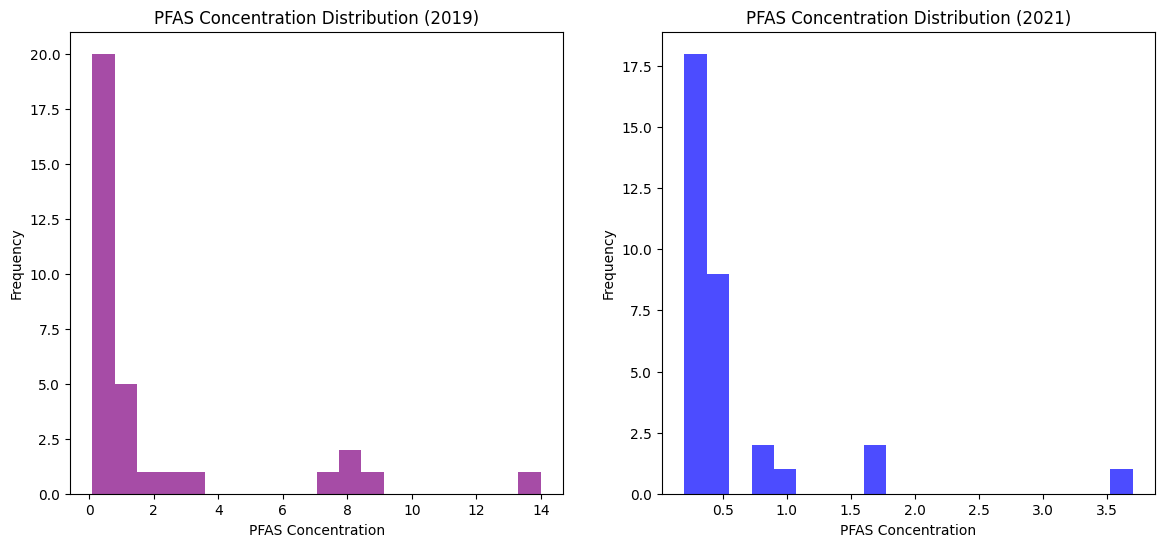

Pearson Correlation between Year and PFAS Site Concentrations: -0.2872090089599895
Spearman Correlation between Year and PFAS Site Concentrations: -0.15639706640801798


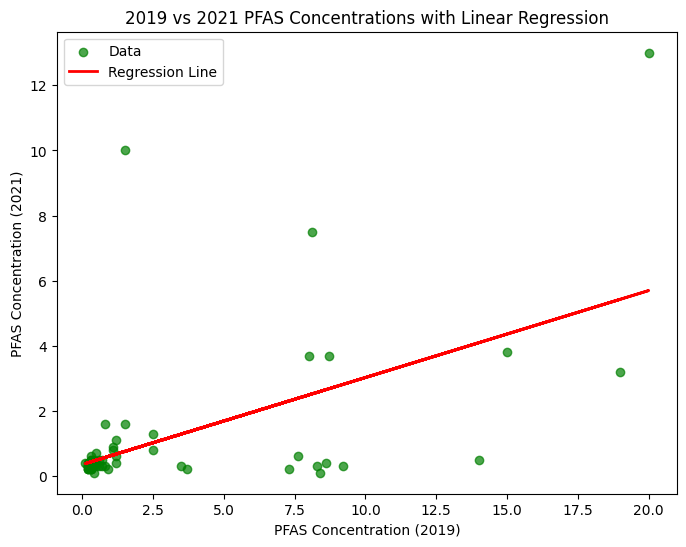

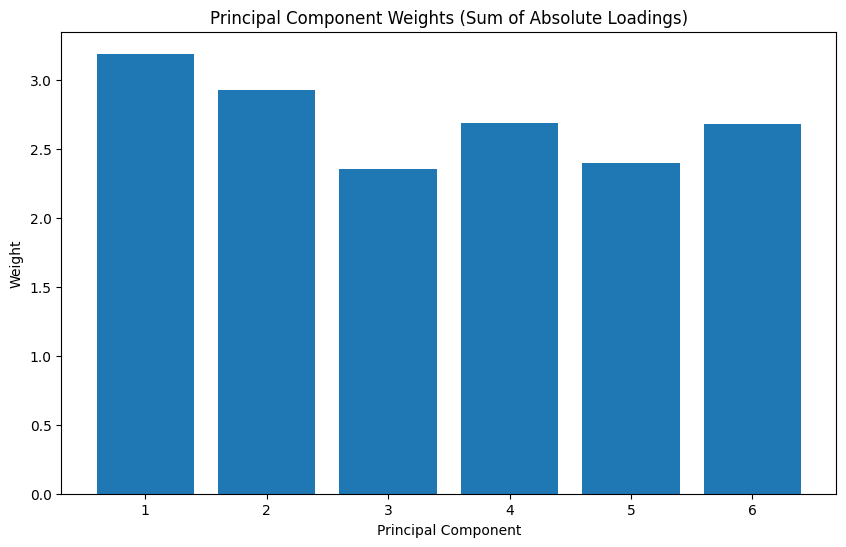

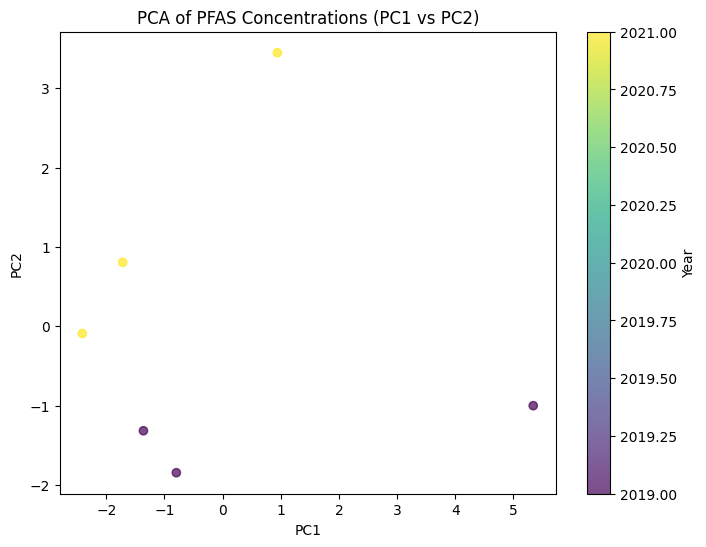

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('Comma Delimited PFAS Data.csv')  
data.replace('-', np.nan, inplace=True)                        # Replace "-" with Nan
site_conc = [f'Site {num}' for num in range(1, 12)]
data[site_conc] = data[site_conc].apply(pd.to_numeric, errors='coerce')

# 1.a. Data Description by Site
stats = data[site_conc].agg(['mean', 'median', 'std'])
print("Data Description For Each Site Tested")
print(stats)

# 1.b. Histograms for 2019 and 2021
data_2019 = data[data['Year'] == 2019].dropna(subset=site_conc)  # Data for 2019, taking out Nan
data_2021 = data[data['Year'] == 2021].dropna(subset=site_conc)  # Data for 2021, taking out Nan
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)      # 2019 histogram
plt.hist(data_2019[site_conc].values.flatten(), bins=20, color='purple', alpha=0.7)  #flatten data for plotting
plt.title('PFAS Concentration Distribution (2019)')
plt.xlabel('PFAS Concentration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)      # 2021 histogram
plt.hist(data_2021[site_conc].values.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('PFAS Concentration Distribution (2021)')
plt.xlabel('PFAS Concentration')
plt.ylabel('Frequency')
plt.show()    #display histograms

# 2.a. Pearson and Spearman Correlation Coefficients
concentration_values = data[site_conc].values.flatten()
year_values = np.repeat(data['Year'].values, len(site_conc))
valid_data = data.dropna(subset=['Year'] + site_conc)          #get rid of Nan

concentration_values = valid_data[site_conc].values.flatten()  #checking length
year_values = np.repeat(valid_data['Year'].values, len(site_conc))

pear = np.corrcoef(concentration_values, year_values)[0, 1]       #finding pearson coefficient
print(f"Pearson Correlation between Year and PFAS Site Concentrations: {pear}")

spear, _ = spearmanr(concentration_values, year_values)           #finding spearman coefficient
print(f"Spearman Correlation between Year and PFAS Site Concentrations: {spear}")

# 2.b. Linear Regression between Site 1 and Site 2
data_2019 = data[data['Year'] == 2019][site_conc].values.flatten()
data_2021 = data[data['Year'] == 2021][site_conc].values.flatten()

data_without_nan = ~np.isnan(data_2019) & ~np.isnan(data_2021)     # take out NaN values 
data_2019_new = data_2019[data_without_nan]
data_2021_new = data_2021[data_without_nan]

X = data_2019_new.reshape(-1, 1)  # Independent variable (2019 data)
y = data_2021_new  # Dependent variable (2021 data)
reg = LinearRegression()            #linear regression
reg.fit(X, y)
y_pred = reg.predict(X)

#2.c. Scatter plots with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(data_2019_new, data_2021_new, alpha=0.7, color='green', label='Data')
plt.plot(data_2019_new, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('2019 vs 2021 PFAS Concentrations with Linear Regression')
plt.xlabel('PFAS Concentration (2019)')
plt.ylabel('PFAS Concentration (2021)')
plt.legend()
plt.show()

# 3.a. Principal Component Analysis (PCA)
data_pca = data[site_conc].dropna()                              # Remove rows with NaN values
scale = StandardScaler()                                         #scale data for PCA
data_scaled = scale.fit_transform(data_pca)
pca = PCA()                                                      #conduct PCA
pca.fit(data_scaled)

# 3.b. Bar chart of PCA weights
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.components_) + 1), np.abs(pca.components_).sum(axis=1))
plt.title('Principal Component Weights (Sum of Absolute Loadings)')
plt.xlabel('Principal Component')
plt.ylabel('Weight')
plt.show()

# 3.c. PCA plot (colored by Year)
pca = PCA(n_components=2)
data_pca_fit = pca.fit_transform(data_scaled)
new_data = data.dropna(subset=site_conc).copy()  
new_data['PC1'] = data_pca_fit[:, 0]
new_data['PC2'] = data_pca_fit[:, 1]

plt.figure(figsize=(8, 6))                                         # PCA plot colored by Year
plt.scatter(new_data['PC1'], new_data['PC2'], c=new_data['Year'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Year')
plt.title('PCA of PFAS Concentrations (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()                                                        #show PCA plot